# Introduction
La transition énergétique et la gestion de l'énergie représentent des enjeux sociétaux et actuels. 

Par ailleurs, la transition numérique, les nouvelles technologies et la science des données constituent des leviers pour relever ces défis. 

Aussi, je porte un fort intérêt pour tous ces domaines (science des données, énergie) ; et j'aimerais, par mon travail, participer à l'effort collectif pour les accélerer, les améliorer.

C'est pourquoi je réalise ce petit projet, en autonomie (pas dans le cadre de mes cours), d'exploration et d'analyse d'une base de données sur la production d'énergie solaire.



# Références
J'ai trouvé le jeu de données sur kaggle : https://www.kaggle.com/datasets/stucom/solar-energy-power-generation-dataset

En plus d'utiliser les bases techniques et méthodologiques que j'ai pu acquérir en cours, j'essai également d'apprendre à l'aide de différentes ressources en ligne. 

En voici certaines : 
https://www.youtube.com/watch?v=jCYjcEaNfzc&list=PLXf2gx1SC6EI2QYKjekXc4AvaReogmW8X

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

Import and visualize the file

In [44]:
#Import and modify the data
FILE = "sol_pow_gen.csv"
data = pd.read_csv(FILE)

print(data.shape)

#As we dont have a column with standard date type values (Year, month, day and hour are all separated into different columns), we want to create a column of dates with the right format
#Double brackets here data[["Year", "Month", "Day"]] to make a data frame
data.insert(5, "datetime", pd.to_datetime(data[["Year", "Month", "Day"]]) + pd.to_timedelta(data["First Hour of Period"], unit="h"))

#The columns Year, Month, Day and First Hour are no longer needed and are redundant
data = data.drop(["Year", "Month", "Day", "First Hour of Period"], axis=1)

#We want degrees celsius not F
data["Average Temperature (Day)"] = round((data["Average Temperature (Day)"] - 32) * (5/9), 2)


data.head()

(2920, 16)


,Day of Year,datetime,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008-09-01 01:00:00,False,0.859897,20.56,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008-09-01 04:00:00,False,0.628535,20.56,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008-09-01 07:00:00,True,0.397172,20.56,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008-09-01 10:00:00,True,0.165810,20.56,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008-09-01 13:00:00,True,0.065553,20.56,28,7.5,0,10.0,21,3.0,29.89,30069


In [45]:
#We can check that the data types are all convenient here
data.dtypes


Day of Year                                      int64
datetime                                datetime64[ns]
Is Daylight                                       bool
Distance to Solar Noon                         float64
Average Temperature (Day)                      float64
Average Wind Direction (Day)                     int64
Average Wind Speed (Day)                       float64
Sky Cover                                        int64
Visibility                                     float64
Relative Humidity                                int64
Average Wind Speed (Period)                    float64
Average Barometric Pressure (Period)           float64
Power Generated                                  int64
dtype: object

In [46]:
#Let's explore the data with .describe()
data.describe(datetime_is_numeric=True)

,Day of Year,datetime,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2920.000000,2920,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,183.334247,2009-03-02 11:30:00,0.503294,14.704877,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
min,1.000000,2008-09-01 01:00:00,0.050401,5.560000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,92.000000,2008-12-01 06:15:00,0.243714,11.670000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,183.000000,2009-03-02 11:30:00,0.478957,15.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,275.000000,2009-06-01 16:45:00,0.739528,17.220000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,366.000000,2009-08-31 22:00:00,1.141361,25.560000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000
std,105.769919,NaN,0.298024,3.800963,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413


In [53]:
#Getting the full range of times
date_range = pd.date_range(start = "2008-09-01 01:00:00", end = "2009-08-31 22:00:00", freq="3h")

#Checking if this corresponds to our data
assert (date_range == data["datetime"]).all()

#Checking if we have duplicates
data.duplicated().sum()

#Checking for missing value
data.isna().sum().sum()

1

In [ ]:
#It would be interesting to see if the timeperiods with no daylight striclty yields 0 energy generated every time
#As we can see there are none, so to train a model to predict the energy output, we would mayhaps benefit from removing these rows 

data[(data["Is Daylight"] == False)&(data["Power Generated"] != 0)] #empty data frame
#(data[(data["Is Daylight"] == False)]["Power Generated"] != 0).any()         => more elegant manner of checking


data_light = data[data["Is Daylight"] == True].drop("Is Daylight", axis=1)   #We don't need the Is Daylight column anymore (it's all true)

data_light.head()

,Day of Year,datetime,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2,245,2008-09-01 07:00:00,0.397172,20.56,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008-09-01 10:00:00,0.165810,20.56,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008-09-01 13:00:00,0.065553,20.56,28,7.5,0,10.0,21,3.0,29.89,30069
5,245,2008-09-01 16:00:00,0.296915,20.56,28,7.5,0,10.0,20,23.0,29.85,16280
6,245,2008-09-01 19:00:00,0.528278,20.56,28,7.5,0,10.0,36,15.0,29.83,515


In [105]:
#As we can see, daylight doesn't guarantee energy production  
data_light[data_light["Power Generated"] == 0]    

,Day of Year,datetime,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
150,263,2008-09-19 19:00:00,0.567347,17.22,21,7.3,4,10.0,81,11.0,29.98,0
214,271,2008-09-27 19:00:00,0.586592,18.89,29,9.1,0,10.0,73,15.0,29.89,0
222,272,2008-09-28 19:00:00,0.589060,16.11,30,12.3,1,10.0,87,11.0,29.93,0
238,274,2008-09-30 19:00:00,0.594633,18.33,29,6.9,1,10.0,68,15.0,29.99,0
254,276,2008-10-02 19:00:00,0.598862,19.44,27,9.5,3,10.0,87,13.0,29.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2521,194,2009-07-13 04:00:00,0.568156,21.11,28,10.6,1,10.0,86,6.0,30.00,0
2529,195,2009-07-14 04:00:00,0.568156,22.78,30,10.4,1,10.0,72,6.0,29.85,0
2635,208,2009-07-27 10:00:00,0.159251,16.11,29,14.2,1,10.0,70,14.0,29.95,0
2818,231,2009-08-19 07:00:00,0.387376,18.33,30,8.6,4,10.0,84,0.0,29.85,0


<AxesSubplot:>

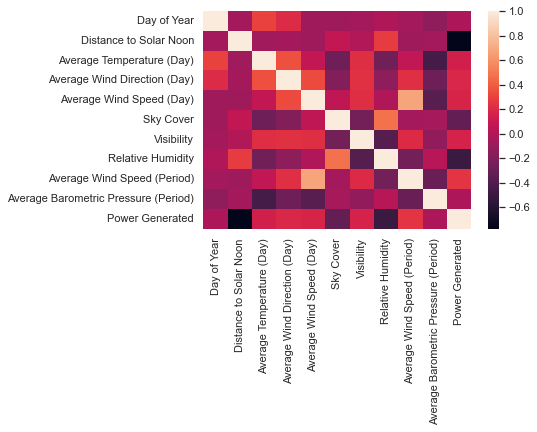

In [ ]:
#Let's try and see if there are any correlated variables
corr_mat = data_light.corr()

sns.set_theme()
sns.heatmap(corr_mat)

#We are interested in the variables strongly correlated with the Power Generated data ; 
#As we can see, Distance to solar noon is strongly negatively correlated with the Power Generated 

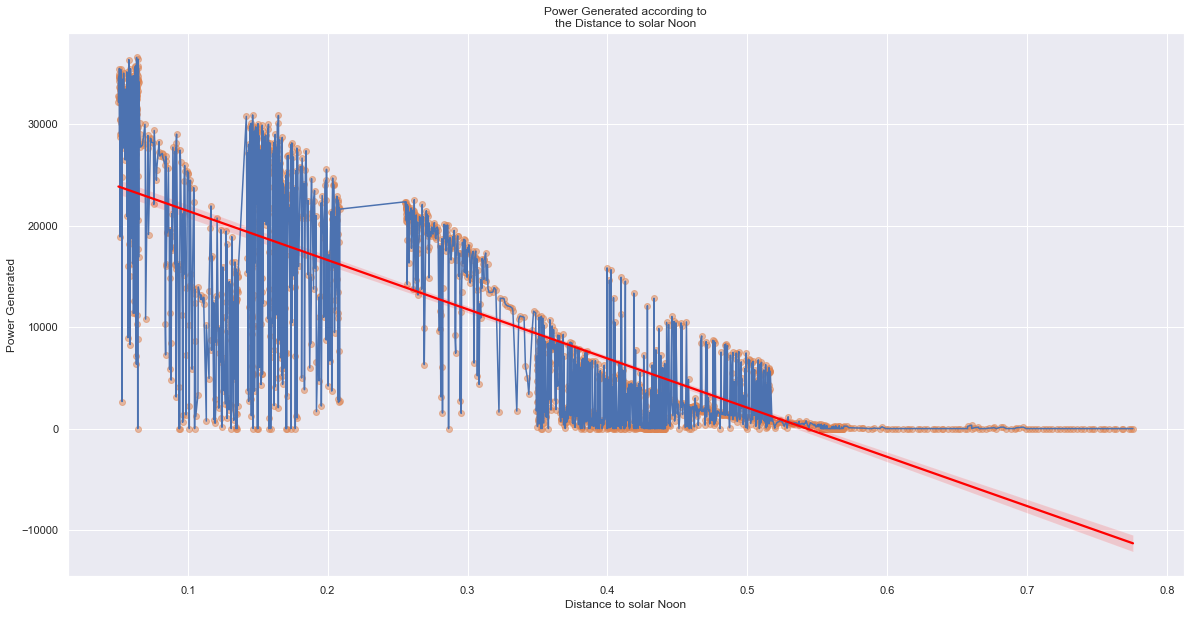

In [128]:
#We can try and plot it to see if we can spot any trend 
pow_gen = data_light.sort_values(by="Distance to Solar Noon")[["Power Generated"]]
dist_sol = data_light.sort_values(by="Distance to Solar Noon")["Distance to Solar Noon"]

plt.figure(figsize=(20, 10))
plt.plot(dist_sol, pow_gen)
sns.regplot(x=dist_sol, y=pow_gen, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Power Generated according to\nthe Distance to solar Noon")
plt.xlabel("Distance to solar Noon")
plt.ylabel("Power Generated")
plt.show()

In [ ]:
#Modèle demandé à ChatGPT, je vérifie s'il est pertinent (les lignes signalées par #Vérification sont de moi, les autres de chatGPT)
from statsmodels.tsa.arima.model import ARIMA

crop_data = data[0:len(data)-10]        #Vérification : on fait un jeu de données d'entraînement, le reste étant les données pour tester le modèle

# Définir l'ordre du modèle (AR, I, MA)
model = ARIMA(crop_data["Power Generated"], order=(2,1,2))
model_fit = model.fit()

# Prédire les prochaines valeurs
predictions = model_fit.forecast(steps=10)
print(predictions)
print(data[-10:]["Power Generated"])   #Vérification

#On constate que cette méthode n'est pas adaptée, ou bien il faudrait tester avec une proportion de données d'entraînement et de données de test différente 

/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/matt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2910     -488.798207
2911    -2702.367639
2912     5309.438869
2913    12590.991205
2914    13746.700673
2915    10655.147542
2916     7681.058415
2917     7110.494356
2918     8298.502918
2919     9510.280748
Name: predicted_mean, dtype: float64
2910      895
2911        0
2912        0
2913        0
2914      464
2915     6995
2916    29490
2917    17257
2918      677
2919        0
Name: Power Generated, dtype: int64
